# Time Series analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import itertools

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
plt.style.use('bmh')

# Visualize Tractor sales data as time series

In [2]:


#url = 'http://www.ucanalytics.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv'
# s=requests.get(url)

sales_data = pd.read_csv("Tractor-Sales.csv")



In [3]:
sales_data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [4]:
# accesing directly from the url

from io import StringIO
import requests

url = 'http://www.ucanalytics.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv'
s =requests.get(url).text


In [5]:
ss=StringIO(s)

In [6]:
sales_data2=pd.read_csv(ss)

In [7]:
sales_data2.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [8]:
# since the complete date was not mentioned, we assume that it is first of every month
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(sales_data))

In [9]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [10]:
import calendar
sales_data['Month-Year'].head()

0    Jan-03
1    Feb-03
2    Mar-03
3    Apr-03
4    May-03
Name: Month-Year, dtype: object

In [11]:

dates.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', length=144)

In [12]:
dates.week

Int64Index([ 1,  5,  9, 14, 18, 22, 27, 31, 36, 40,
            ...
             9, 14, 18, 22, 27, 31, 36, 40, 44, 49],
           dtype='int64', length=144)

In [13]:
# create new columns by name 'Month' and 'Year'
sales_data['Month']= dates.month

In [14]:
sales_data['Month'].head()

0    1
1    2
2    3
3    4
4    5
Name: Month, dtype: int64

In [15]:
sales_data['Year']=dates.year

In [16]:
sales_data['Year'].head()

0    2003
1    2003
2    2003
3    2003
4    2003
Name: Year, dtype: int64

In [17]:
sales_data.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003


In [18]:
# change months:1,2,3... with the Month abbreviation
calendar.month_abbr[1]

'Jan'

In [19]:
calendar.month_abbr[2]

'Feb'

In [20]:
sales_data['Month'].head()

0    1
1    2
2    3
3    4
4    5
Name: Month, dtype: int64

In [21]:
sales_data['Month']=sales_data['Month'].apply(lambda x: calendar.month_abbr[x])

In [22]:
sales_data['Month'].head()

0    Jan
1    Feb
2    Mar
3    Apr
4    May
Name: Month, dtype: object

In [23]:
sales_data.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [24]:
# now it is good to remove the month-year column,,,as well as rename 'Number of tractor sold' to 'Tractor-sales'
sales_data.drop(['Month-Year'],axis=1,inplace=True)

#df.rename(index=str, columns={"A": "a", "B": "c"})

sales_data.rename(columns={'Number of Tractor Sold':'Tractor-sales'},inplace=True)

In [25]:
sales_data.head(10)

,Tractor-sales,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003
5,189,Jun,2003
6,207,Jul,2003
7,207,Aug,2003
8,171,Sep,2003
9,150,Oct,2003


In [26]:
# arrange the columns as given earlier
sales_data=sales_data[['Month','Year','Tractor-sales']]

In [27]:
sales_data.head()

,Month,Year,Tractor-sales
0,Jan,2003,141
1,Feb,2003,157
2,Mar,2003,185
3,Apr,2003,199
4,May,2003,203


In [28]:
sales_data.index 

RangeIndex(start=0, stop=144, step=1)

In [29]:
sales_data.set_index(dates,inplace=True)

In [30]:
sales_data.head(10)

,Month,Year,Tractor-sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203
2003-06-01,Jun,2003,189
2003-07-01,Jul,2003,207
2003-08-01,Aug,2003,207
2003-09-01,Sep,2003,171
2003-10-01,Oct,2003,150


In [31]:
sales_ts=sales_data['Tractor-sales']

In [32]:
sales_ts.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor-sales, dtype: int64

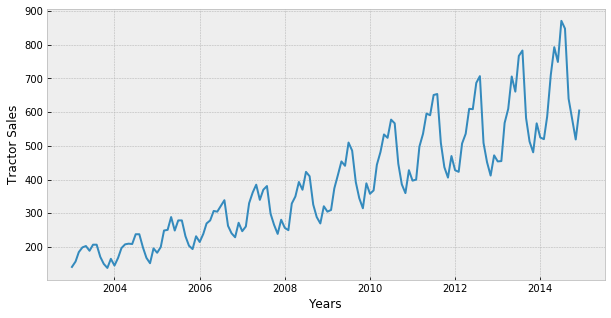

In [33]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#warnings.warn(msg, FutureWarning)

plt.figure(figsize=(10, 5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')
plt.show()

In [34]:
# Time series decomposition : trend , seasonality , cylce, irregular remainder for tractor sales

# to decipher trends in the above tractor sales time series, we use Rolling statistics, Dickey-Fuller test

#-------------------------------
# plotting Rolling statistics : plot the moving average or moving variance and see if it varies with time
# at any time 't' , we will take the average/variance of the last year., last 12 months (its a visual technique)

#-------------
# Dickey-Fuller Test : this is one of the statistical test for checking stationarity.
# Null-Hypothesis is that the Time Series is non-stationary. The test results comprise of a Test Statistic and some 
# critical values for difference confidence levels.
# if the test statistic is less than the 'Critical Value', we can reject the null hypothesis and say that the 
# Time seris is stationary


In [35]:
#  Moving Average : the idea is to remove all the zigzag motions (wrinkle like curves) from the time series to produce
#  a steady trend through averaging values of a time period

# Moving Avg = [Sigma(i=-m to m)Yt+i]/2m


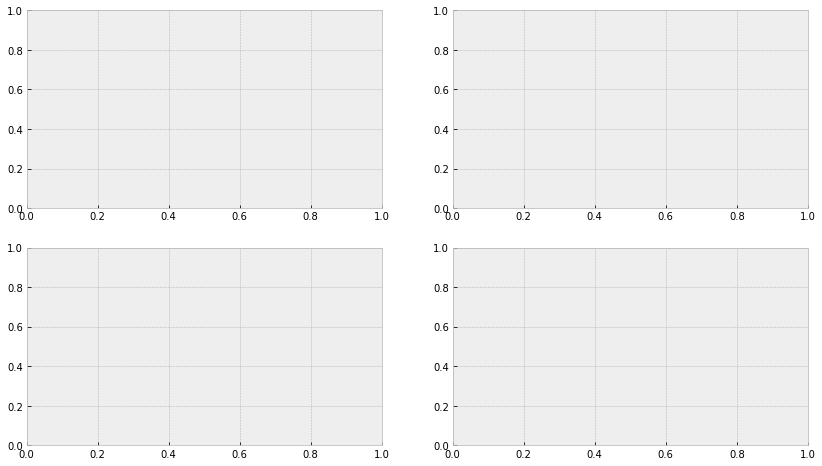

In [36]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

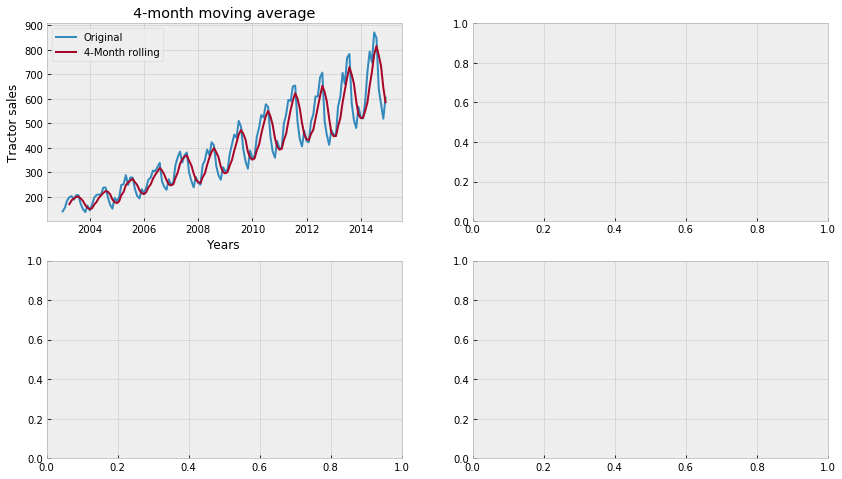

In [37]:
fig, axes=plt.subplots(2,2,sharey=False,sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales_ts.index,sales_ts,label='Original')
axes[0][0].plot(sales_ts.index,sales_ts.rolling(window=4).mean(),label='4-Month rolling')

axes[0][0].set_xlabel('Years')
axes[0][0].set_ylabel('Tractor sales')
axes[0][0].set_title('4-month moving average')
axes[0][0].legend(loc='best')

plt.show()


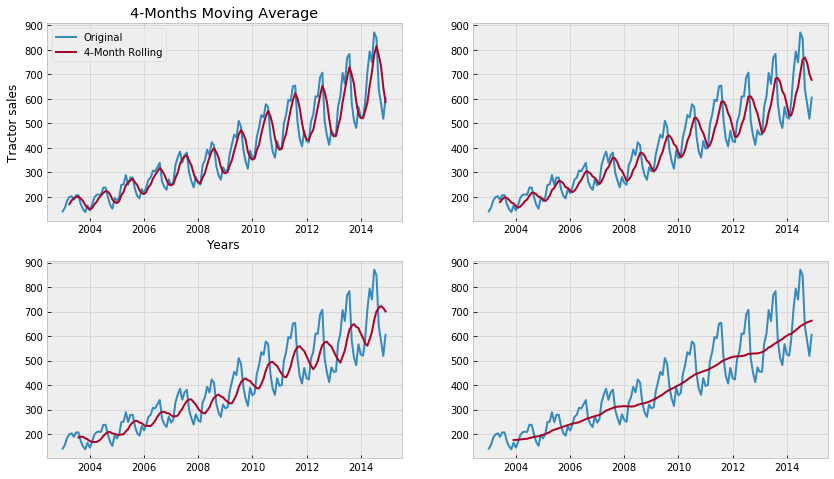

In [38]:
fig, axes=plt.subplots(2,2,sharey=False,sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales_ts.index,sales_ts,label='Original')
axes[0][0].plot(sales_ts.index,sales_ts.rolling(window=4).mean(),label='4-Month Rolling')

axes[0][0].set_xlabel('Years')
axes[0][0].set_ylabel('Tractor sales')
axes[0][0].set_title('4-Months Moving Average')
axes[0][0].legend(loc='best')


##----##

axes[0][1].plot(sales_ts.index,sales_ts,label='Original')
axes[0][1].plot(sales_ts.index,sales_ts.rolling(window=6).mean(),label='6-month Rolling')

axes[0][1]
axes[0][1]
axes[0][1]
axes[0][1]


##----##

axes[1][0].plot(sales_ts.index,sales_ts,label='Original')
axes[1][0].plot(sales_ts.index,sales_ts.rolling(window=8).mean(),label='8-month Rolling')

axes[1][0]
axes[1][0]
axes[1][0]
axes[1][0]

##----##

axes[1][1].plot(sales_ts.index,sales_ts,label='Original')
axes[1][1].plot(sales_ts.index,sales_ts.rolling(window=12).mean(),label='12-month Rolling')

axes[1][1]
axes[1][1]
axes[1][1]
axes[1][1]

##----##

plt.show()


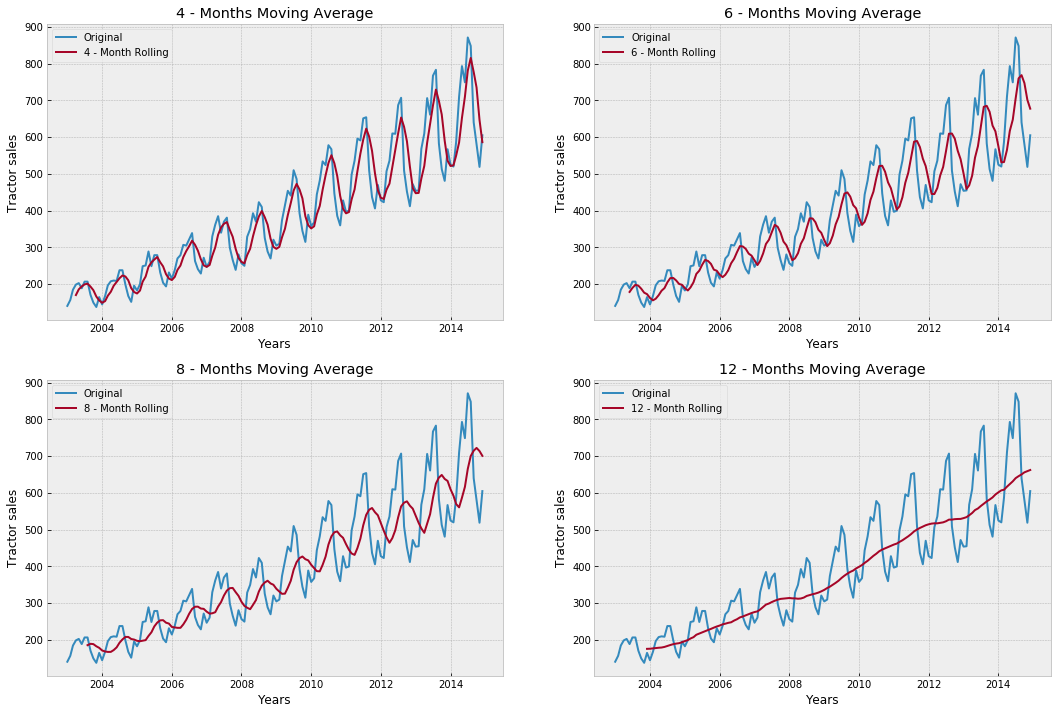

In [39]:
##### Other way to obtain the similar plots with less lines of code##########



fig, axes=plt.subplots(2,2,sharey=False,sharex=False)
fig.set_figwidth(18)
fig.set_figheight(12)

# rolling month window size its a (2 by 2) matrix - setting it so as to be like the (2 by 2) - subplots in figure
w=[[4,6],[8,12]]

for i in range(len(w)):
    for j in range(len(w[i])):
        #roll=rolling[i][j]
        axes[i][j].plot(sales_ts.index,sales_ts,label='Original')
        axes[i][j].plot(sales_ts.index,sales_ts.rolling(window=w[i][j]).mean(), label = (str(w[i][j]) + ' - Month Rolling'))
        #print(w[i][j])   # -- for debugging or checking
        #print(roll[0])   # -- for debugging or checking
        axes[i][j].set_xlabel('Years')
        axes[i][j].set_ylabel('Tractor sales')
        axes[i][j].set_title( str(w[i][j])+' - Months Moving Average')
        
        axes[i][j].legend(loc='best')  # if this line is commented or non-exsting...label also will not be visible
        

        

        

In [40]:
# a 12 month moving average produce a wrinkle free curve 

# Now , lets draw the Rolling mean and standard deviation on window of 12 months 

In [41]:
# Determining the Rolling statistics

rolmean = sales_ts.rolling(window=12).mean()
rolstd = sales_ts.rolling(window=12).std()

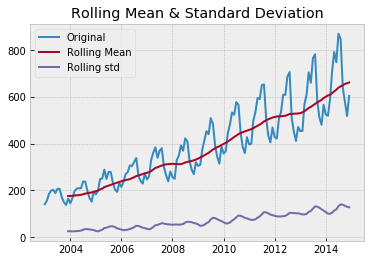

In [42]:
#plot rolling statistics

orig= plt.plot(sales_ts,label='Original')
mean=plt.plot(rolmean,label='Rolling Mean')
std1=plt.plot(rolstd,label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [43]:
# Lets perform the Dickey Fuller test on the timeseries and verify the null hypothesis that the TS is non-stationary

In [44]:
# Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')

dftest=adfuller(sales_ts,autolag='AIC')
dftest


Results of Dickey Fuller Test:


(1.108825059146738,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [45]:
dfoutput =pd.Series(dftest[0:4],index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])

In [46]:
dfoutput

Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
dtype: float64

In [47]:
dftest[4]

{'1%': -3.482087964046026,
 '5%': -2.8842185101614626,
 '10%': -2.578864381347275}

In [48]:
for key,value in dftest[4].items():
    dfoutput['Critical values (%s)' %key]=value
print(dfoutput)

Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
Critical values (1%)            -3.482088
Critical values (5%)            -2.884219
Critical values (10%)           -2.578864
dtype: float64


In [49]:
# though the variaton in standard deviation is small , 
# rolling mean is clearly increasing with time and this is not a stationary series
# also the test statistic is way more than the critical values.

#also we while plotting the moving average over months that there is a MONTHLY PATTERN




In [50]:
# now lets decipher the seosonal component

In [51]:
# Seasonality - Time Series Decomposition

# we will see how the number of tractors sold vary a month on a month basis
# we will plot a stacked annual plot to observe the seasonality in our data



In [52]:
sales_data.head(5)

,Month,Year,Tractor-sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [53]:
monthly_sales_data=pd.pivot_table(sales_data,values='Tractor-sales',columns='Year',index='Month')

In [54]:
monthly_sales_data.head(5)

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525


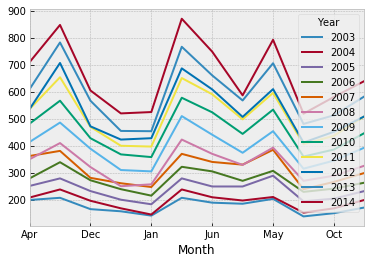

In [55]:
monthly_sales_data.plot()
plt.show()

In [56]:
## ^^^^^ as we can see the months are not sorted in proper order..we first rearrange the months and draw proper plot

In [57]:
monthly_sales_data=monthly_sales_data.reindex(index=['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [58]:
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


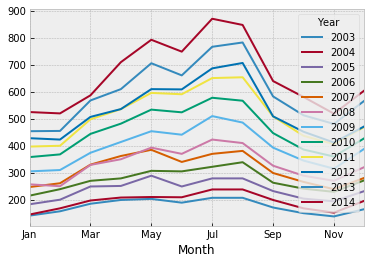

In [59]:
monthly_sales_data.plot()
plt.show()

In [60]:
# inference1 : July and AUgust are the peak years for tractor sales and the varience and the mean value in july and august 

In [61]:
yearly_sales_data=pd.pivot_table(sales_data,values='Tractor-sales',columns='Month',index='Year')
yearly_sales_data.head(5)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299


In [62]:
# here again the columns are not sorted in proper order..this time we re arrange colummns


In [63]:
yearly_sales_data.head(5)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299


In [64]:
yearly_sales_data=yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [65]:
yearly_sales_data.head(5)

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281


In [66]:
yearly_sales_data.index

Int64Index([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014],
           dtype='int64', name='Year')

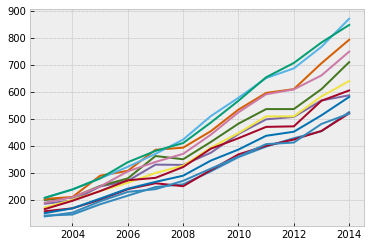

In [67]:
plt.plot(yearly_sales_data.index,yearly_sales_data.values[:,:])
#plt.legend(loc='best')
plt.show()

In [68]:
# inference2 : The tractor sales have been increasing without fail each year 

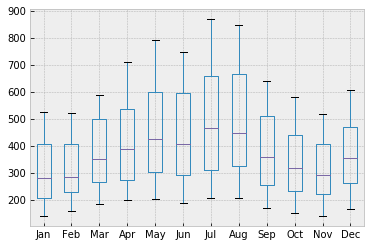

In [69]:
yearly_sales_data.boxplot()
plt.show()

In [70]:
# inference3: Mean and Varience value in july and august are also much higher than any of the other months
# (also check inference1 above)

In [71]:
# inference4 : We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing 
# trend in the beginning of the year and drops down towards the end of the year. 
# We can see a seasonal effect with a cycle of 12 months.

# ARIMA : Auto Regressive-Integrated-Moving Average model 
(convenient notation: p, d, q : levels of AR, I ,MA parts)

In [109]:
# step1 of information extraction: 
#Integrated(I):  substract time series with its lagged series (by differencing) to extract trends from the data

# Original series is substracted with its lagged series
# No differencing(d=0) Yt' =Yt  
# 1st differencing (d=1) Yt'= Yt - Y(t-1) # t or t-1 or suffix and not in braces
# 2nd differencing (d=2) Yt' =Yt - Y(t-1) - [Y(t-1) - Y(t-2)]

# Now the residual data of most time series usually become trend-less (kind of stationary)after first order differencing 
# represented by ARIMA(0,1,0)
# where the order values are :AR(p)=0, d(I)=1, q(MA)=0.
# If in the trend, still the trend exists then d =2 is  chosen( differencing of order 2 is chosen)

In [73]:
# step2 of information extraction: 
# AR(AutoRegressive): extract the influence of the previous period's values on the current period

#After the data is made stationary, the next step is AR, here we try to extract the influence of 
#values of previous periods on the current period. This is done by regression model with time lagged period values
# as independant variables

# Yt=c + α1*Y(t −1) + α2*Y(t−2) + … + αp*Y(t−p) + e(t)

# AR model of order 1 i.e p=1 or ARIMA(1,0,0) is represented as

# Yt=c+α1*Y(t−1)+et

In [74]:
# step3 of information extraction: 
# Moving Average : extract the influence on the previous period's error terms on the current period's error
# Moving Average(MA) of ARIMA is  developed with the following simple multiple linear regression values with 
# the lagged error values as independent or predictor variables.

# Yt=c + e(t) + β1*e(t−1) + β2*e(t−2) + … + βq*e(t−q)

# MA model of order 1 i.e. q=1 or ARIMA(0,0,1) is represented by the following regression equation

#Yt=c + e(t) + β1*e(t−1)

# ARIMA model : 
Step1: Difference data to make data stationary on mean (remove trend)

In [75]:
# There is an upward trend 

In [76]:
type(sales_ts)

pandas.core.series.Series

In [77]:
sales_ts.diff(periods=1).head()

2003-01-01     NaN
2003-02-01    16.0
2003-03-01    28.0
2003-04-01    14.0
2003-05-01     4.0
Freq: MS, Name: Tractor-sales, dtype: float64

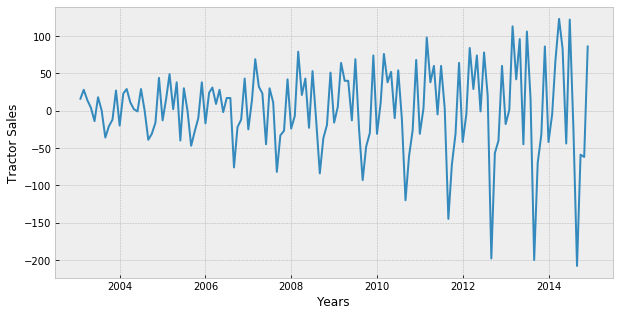

In [78]:
plt.figure(figsize=(10, 5))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')
plt.show()

Step2: log transform data to make data stationary on variance

In [79]:
sales_ts_log=np.log10(sales_ts)
sales_ts_log.head()
#np.log10(sales_ts).head()

2003-01-01    2.149219
2003-02-01    2.195900
2003-03-01    2.267172
2003-04-01    2.298853
2003-05-01    2.307496
Freq: MS, Name: Tractor-sales, dtype: float64

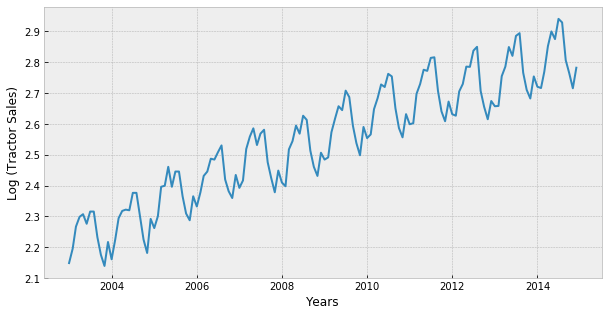

In [80]:
plt.figure(figsize=(10,5))
plt.plot(sales_ts_log)
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')
plt.show()

Step3: Difference Logarithmic transform data to manke data stationary on both mean and variance

In [81]:
sales_ts_diff_log=sales_ts_log.diff(periods=1) 
sales_ts_diff_log.head()

2003-01-01         NaN
2003-02-01    0.046681
2003-03-01    0.071272
2003-04-01    0.031681
2003-05-01    0.008643
Freq: MS, Name: Tractor-sales, dtype: float64

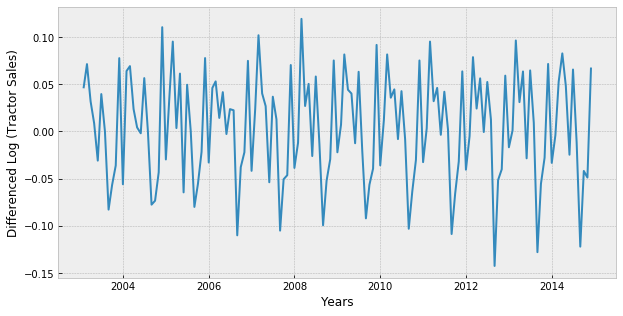

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(sales_ts_diff_log)
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')
plt.show()

Step4: Plot ACF and PACF to identify potential AR and MA model

In [83]:
# cretae Auto correlation function(ACF) and Partial Auto Correlation function(PACF) plots to identify patterns in the above 
# data which is stationary on both mean and variance. The idea is to find the AR and MA components in the residuals.

# To distinguish between the signal and noise is ACF, developed by finding the correlation between a series of its lagged 
# values. For lag=0, the correlation between the signal and itself is 1.

In [84]:
# Dropping the na values

sales_ts_log.dropna(inplace=True)
sales_ts_diff_log.dropna(inplace=True)

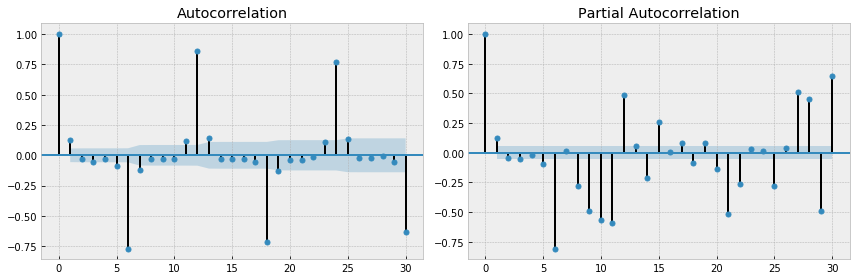

In [85]:
fig, axes=plt.subplots(1,2,sharey=False,sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_diff_log,lags=30,ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_diff_log,lags=30,ax=axes[1], alpha=0.5)
plt.tight_layout()

Step5: Identifying best fit ARIMA model

In [86]:
# To fit the time series data with ARIMA , we need to find the values of ARIMA(p,d,q),(P,D,Q)s that optimise the metric of
# interest such as AIC or BIC. We use "gridsearch" technique to find best combinations 

# AIC = Akaike information Criteria
# BIC= Bayesian information criteria

In [87]:
# define p,d,q in range(0,2)
p=d=q=range(0,2)

# genereate list of possible combinations of p,d,q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]




In [88]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 model - AIC:-732.7289436807876


In [89]:
# The best model is based on AIC values. The idea is to choose a model with minimum AIC and BIC values


Step6: Predict sales on in-sample data using best fit ARIMA model and see how close is it to the actual truth

In [90]:
best_model=sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = (1, 1, 0),
                                             seasonal_order = (1, 0, 1, 12),
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)

best_results = best_model.fit()


In [91]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor-sales   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(1, 0, 1, 12)   Log Likelihood                 370.364
Date:                            Wed, 29 May 2019   AIC                           -732.729
Time:                                    06:08:22   BIC                           -720.878
Sample:                                01-01-2003   HQIC                          -727.913
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3178      0.067     -4.762      0.000      -0.449      -0.187
ar.S.L12       0.9930      0.006   

In [92]:
pred_dynamic=best_results.get_prediction(start=pd.to_datetime('2012-01-01'),Dynamic=True,full_results=True)
pred_dynamic_ci=pred_dynamic.conf_int() # confidence interval
pred_dynamic_ci.head()

,lower Tractor-sales,upper Tractor-sales
2012-01-01,2.612770,2.675450
2012-02-01,2.610510,2.673188
2012-03-01,2.688335,2.751013
2012-04-01,2.710083,2.772762
2012-05-01,2.743811,2.806489


In [93]:
# extract the predicted and true values of the time series

sales_ts_forecasted = pred_dynamic.predicted_mean
sales_ts_forecasted.head()

2012-01-01    2.644110
2012-02-01    2.641849
2012-03-01    2.719674
2012-04-01    2.741422
2012-05-01    2.775150
Freq: MS, dtype: float64

In [94]:
sales_ts_truth= sales_ts_log["2012-01-01":]
sales_ts_truth.head()

2012-01-01    2.631444
2012-02-01    2.626340
2012-03-01    2.705008
2012-04-01    2.729165
2012-05-01    2.785330
Freq: MS, Name: Tractor-sales, dtype: float64

In [95]:
# Computing the mean squared error 
mse= ((sales_ts_forecasted - sales_ts_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))


The Mean Squared Error of our forecasts is 0.0002


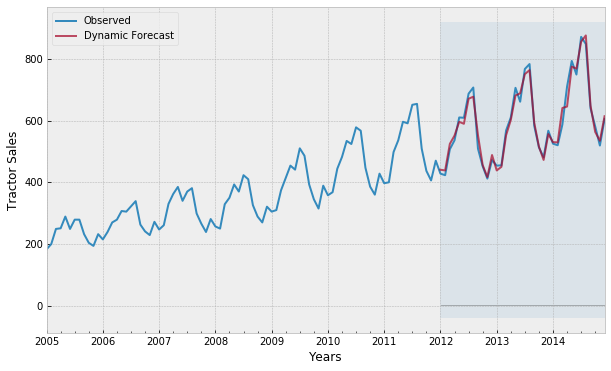

In [96]:
axis = sales_ts['2005':].plot(label='Observed', figsize=(10, 6))
np.power(10, pred_dynamic.predicted_mean).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), sales_ts.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

# Forecast sales using the best fit ARIMA model 

In [97]:
# predict sales for next 3 years 2015,2016,2017
# Get 36 steps ahead in future

n_steps =36
pred_uc_99=best_results.get_forecast(steps=n_steps,alpha =0.1) # alpha =0.1 signifies 99% confidence interval
pred_uc_95=best_results.get_forecast(steps=n_steps,alpha =0.5) # alpha=0.05 95% CI



In [98]:
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

print(pred_ci_99.head())
print(pred_ci_95.head())


            lower Tractor-sales  upper Tractor-sales
2015-01-01             2.720925             2.783603
2015-02-01             2.713317             2.789192
2015-03-01             2.778520             2.868891
2015-04-01             2.825246             2.927144
2015-05-01             2.871340             2.983857
            lower Tractor-sales  upper Tractor-sales
2015-01-01             2.720925             2.783603
2015-02-01             2.713317             2.789192
2015-03-01             2.778520             2.868891
2015-04-01             2.825246             2.927144
2015-05-01             2.871340             2.983857


In [99]:
np.power(10, pred_uc_95.predicted_mean).head()

2015-01-01    565.280261
2015-02-01    563.968242
2015-03-01    666.354919
2015-04-01    751.960215
2015-05-01    846.444810
Freq: MS, dtype: float64

In [100]:
np.power(10, pred_ci_95).head()

,lower Tractor-sales,upper Tractor-sales
2015-01-01,525.926085,607.579245
2015-02-01,516.793741,615.448974
2015-03-01,600.510298,739.419257
2015-04-01,668.722559,845.558680
2015-05-01,743.601148,963.512251


In [101]:
just_testing_date_range=pd.date_range(start='2014-01-01',periods=32,end='2014-02-01')
just_testing_date_range

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10', '2014-01-11', '2014-01-12',
               '2014-01-13', '2014-01-14', '2014-01-15', '2014-01-16',
               '2014-01-17', '2014-01-18', '2014-01-19', '2014-01-20',
               '2014-01-21', '2014-01-22', '2014-01-23', '2014-01-24',
               '2014-01-25', '2014-01-26', '2014-01-27', '2014-01-28',
               '2014-01-29', '2014-01-30', '2014-01-31', '2014-02-01'],
              dtype='datetime64[ns]', freq=None)

In [102]:
sales_ts.index[-1] # for predicting the next 3 years, we will consider the last month of the current time series data: 2014

Timestamp('2014-12-01 00:00:00', freq='MS')

In [103]:
n_steps = 36
idx = pd.date_range(sales_ts.index[-1], periods=n_steps, freq='MS')
idx

DatetimeIndex(['2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [104]:
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])


In [105]:
fc_all = fc_95.combine_first(fc_99)
fc_all.head()

,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99
2014-12-01,565.280261,525.926085,525.926085,607.579245,607.579245
2015-01-01,563.968242,516.793741,516.793741,615.448974,615.448974
2015-02-01,666.354919,600.510298,600.510298,739.419257,739.419257
2015-03-01,751.960215,668.722559,668.722559,845.558680,845.558680
2015-04-01,846.444810,743.601148,743.601148,963.512251,963.512251


In [106]:
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,565.280261,525.926085,607.579245,525.926085,607.579245
2015-01-01,563.968242,516.793741,615.448974,516.793741,615.448974
2015-02-01,666.354919,600.510298,739.419257,600.510298,739.419257
2015-03-01,751.960215,668.722559,845.558680,668.722559,845.558680
2015-04-01,846.444810,743.601148,963.512251,743.601148,963.512251


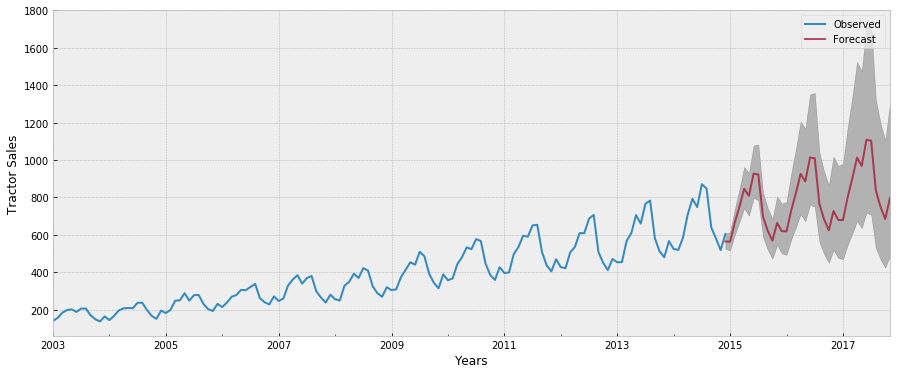

In [107]:
# plot the forecast along with the confidence band
axis = sales_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

In [108]:
# The major assumption here is that the underlying patterns in the time series continue to be same as the predicted model